# 📝 Exercise M5.02 - Tarea de regresión

The aim of this exercise is to find out whether a decision tree
model is able to extrapolate.

By extrapolation, we refer to values predicted by a model outside of the
range of feature values seen during the training.

We will first load the regression data.

Alvaro Lucio-Villegas de Cea


In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_regression.csv")

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data_train, target_train = penguins[[feature_name]], penguins[target_name]

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

First, create two models, a linear regression model and a decision tree
regression model, and fit them on the training data. Limit the depth at
3 levels for the decision tree.

In [2]:
# Write your code here.
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

linear_regression = LinearRegression()
tree = DecisionTreeRegressor(max_depth=3)

linear_regression.fit(data_train, target_train)
tree.fit(data_train, target_train)

DecisionTreeRegressor(max_depth=3)

Create a synthetic dataset containing all possible flipper length from
the minimum to the maximum of the training dataset. Get the predictions of
each model using this dataset.

In [3]:
# Write your code here.
import numpy as np

data_test = pd.DataFrame(np.arange(data_train[feature_name].min(),data_train[feature_name].max()),columns=[feature_name])

In [4]:
# Write your code here.
target_predicted_linear_regression = linear_regression.predict(data_test)
target_predicted_tree = tree.predict(data_test)

Create a scatter plot containing the training samples and superimpose the
predictions of both models on the top.

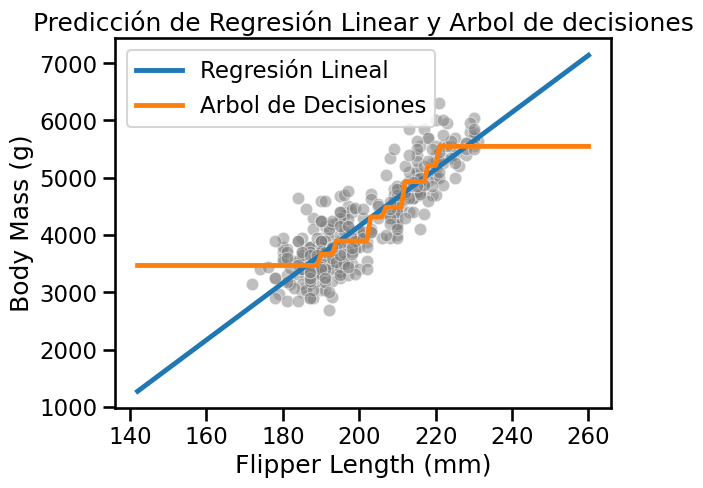

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=penguins, x=feature_name, y=target_name,color="grey", alpha=0.5)
plt.plot(data_test[feature_name], target_predicted_linear_regression,label="Regresión Lineal")
plt.plot(data_test[feature_name], target_predicted_tree, label="Arbol de Decisiones")

plt.legend()

a = plt.title("Predicción de Regresión Linear y Arbol de decisiones")

Now, we will check the extrapolation capabilities of each model. Create a
dataset containing a broader range of values than your previous dataset,
in other words, add values below and above the minimum and the maximum of
the flipper length seen during training.

In [6]:
# Write your code here.
offset = 30
data_test = pd.DataFrame(np.arange(data_train[feature_name].min() - offset,data_train[feature_name].max() + offset),columns=[feature_name])

Finally, make predictions with both models on this new interval of data.
Repeat the plotting of the previous exercise.

In [7]:
# Write your code here.
target_predicted_linear_regression = linear_regression.predict(data_test)
target_predicted_tree = tree.predict(data_test)

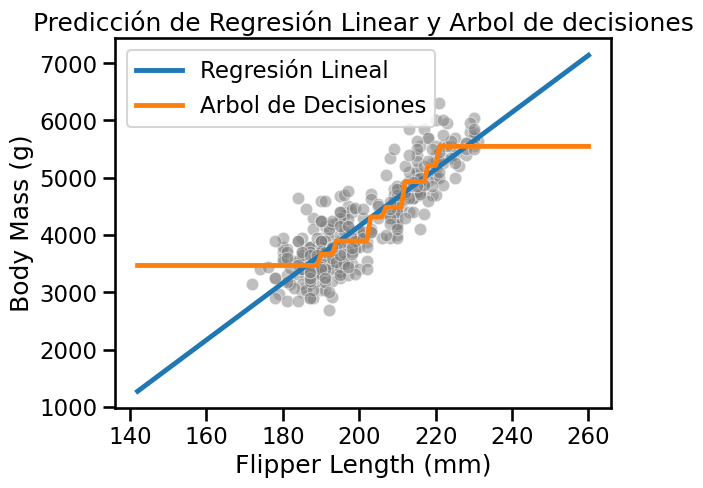

In [10]:
sns.scatterplot(data=penguins, x=feature_name, y=target_name,olor="grey", alpha=0.5)
plt.plot(data_test[feature_name], target_predicted_linear_regression,label="Regresión Lineal")
plt.plot(data_test[feature_name], target_predicted_tree, label="Arbol de Decisiones")

plt.legend()
a = plt.title("Predicción de Regresión Linear y Arbol de decisiones")